In [1]:
%matplotlib notebook
import numpy as np
import scipy.special as sp
import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


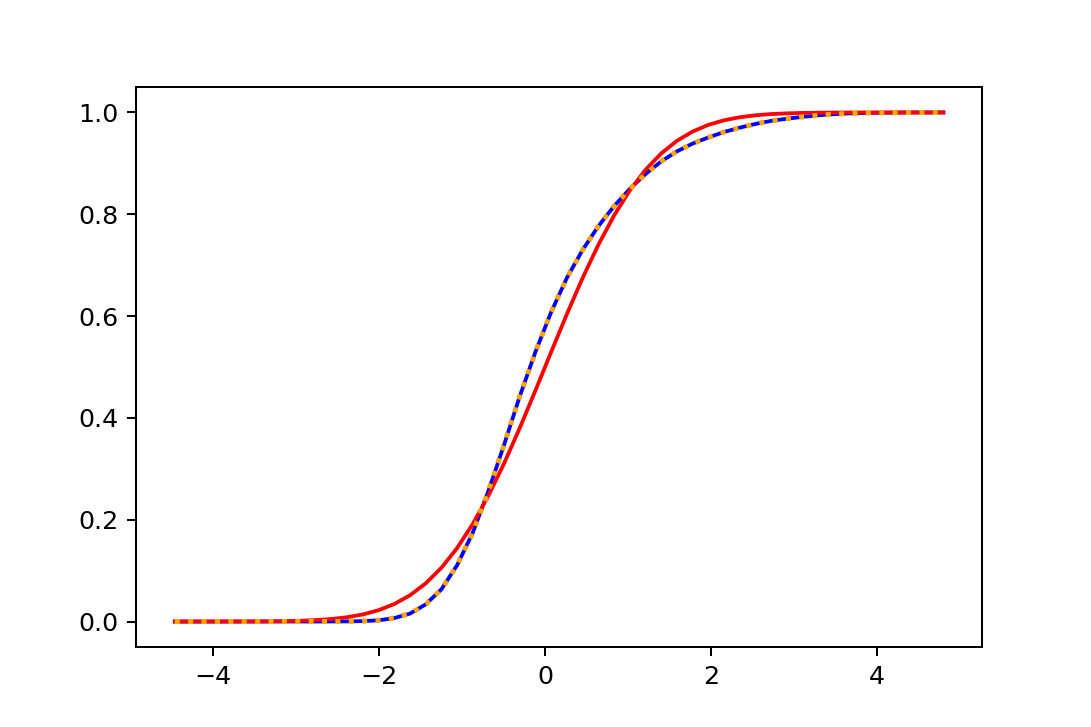

1.0 0.9999976262006955
-2.300885686681536 0.009279216445663145


In [2]:
bin_edges=np.array([-2.34403236, -2.34227869, -2.34052503, -2.33877136, -2.33701769,
       -2.33526403, -2.33351036, -2.3317567 , -2.33000303, -2.32824937,
       -2.3264957 , -2.32474204, -2.32298837, -2.3212347 , -2.31948104,
       -2.31772737, -2.31597371, -2.31422004, -2.31246638, -2.31071271,
       -2.30895904, -2.30720538, -2.30545171, -2.30369805, -2.30194438,
       -2.30019072, -2.29843705, -2.29668339, -2.29492972, -2.29317605,
       -2.29142239, -2.28966872, -2.28791506, -2.28616139, -2.28440773,
       -2.28265406, -2.28090039, -2.27914673, -2.27739306, -2.2756394 ,
       -2.27388573, -2.27213207, -2.2703784 , -2.26862473, -2.26687107,
       -2.2651174 , -2.26336374, -2.26161007, -2.25985641, -2.25810274,
       -2.25634908])
bin_counts=np.array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.5000e+01, 0.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
       5.2000e+01, 6.9000e+01, 2.4500e+02, 7.1500e+02, 1.9860e+03,
       3.9420e+03, 8.1480e+03, 1.3254e+04, 2.1257e+04, 2.8661e+04,
       3.6903e+04, 4.0650e+04, 4.2775e+04, 3.9044e+04, 3.5029e+04,
       3.0005e+04, 2.4566e+04, 2.0821e+04, 1.7639e+04, 1.5135e+04,
       1.3060e+04, 1.1161e+04, 8.8360e+03, 6.8660e+03, 5.4570e+03,
       4.7640e+03, 3.8480e+03, 3.2760e+03, 2.6910e+03, 1.9420e+03,
       1.5910e+03, 1.4370e+03, 9.4400e+02, 7.2300e+02, 3.9800e+02,
       2.0400e+02, 1.0500e+02, 1.1000e+02, 1.8000e+01, 5.0000e+00])

x = 0.5*(bin_edges[:-1]+bin_edges[1:])
dx = (bin_edges[1:]-bin_edges[:-1])
y = bin_counts/np.sum(bin_counts)

xavg = np.sum(x*y)
xrms = np.sqrt(np.sum(x**2*y)-xavg**2)

fig = plt.figure(figsize=(6,4))
#fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax = fig.add_subplot(1,1,1)

yg = np.exp(-0.5*(x-xavg)**2/xrms**2)/(xrms*np.sqrt(2*np.pi))*dx

print(np.sum(y),np.sum(yg))

print(xavg,xrms)
u = (bin_edges[1:]-xavg)/xrms

v = np.cumsum(y)
vg = np.cumsum(yg)

ax.plot(u,v,"b-")
ax.plot(u,vg,"r-")

ug = sp.ndtri(v)
ax.plot(u,0.5*(1+sp.erf(ug/np.sqrt(2))),linestyle=":",color="orange",linewidth=2)

<IPython.core.display.Javascript object>


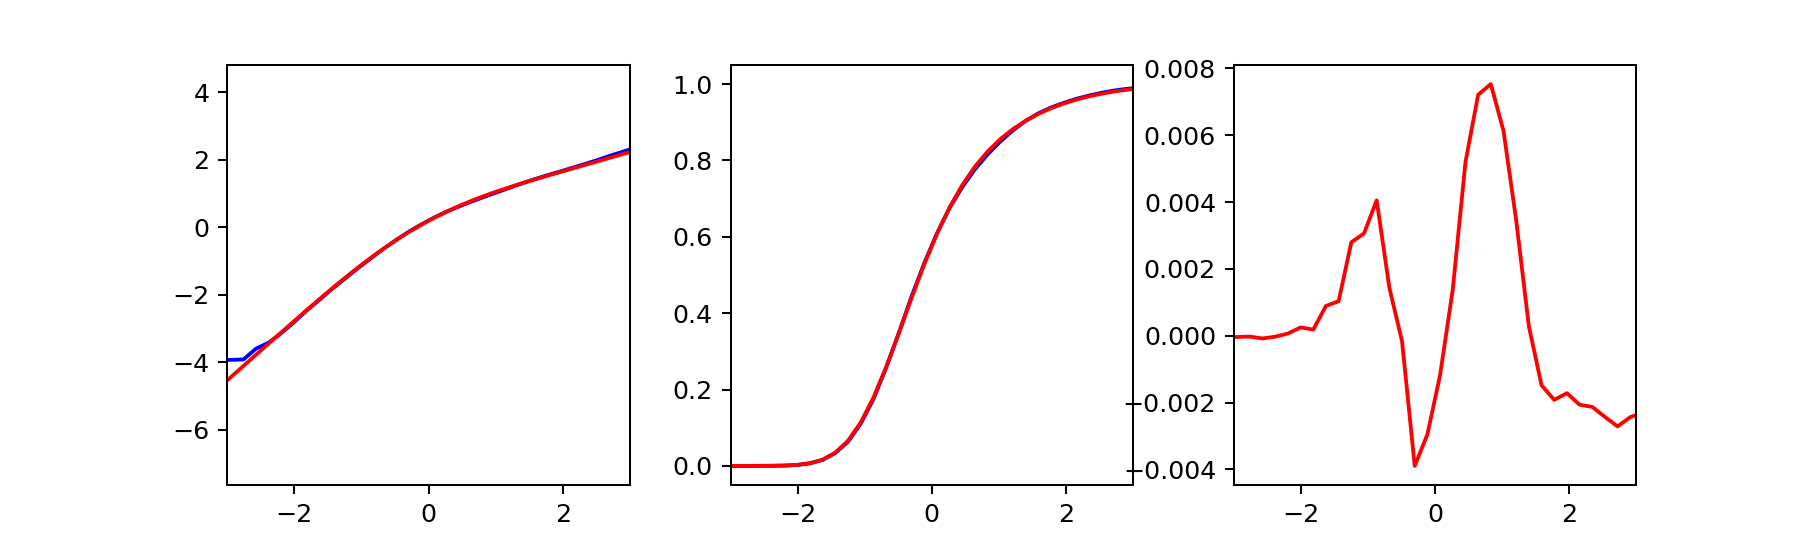

In [3]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2,sharex=ax1)
ax3 = fig.add_subplot(1,3,3,sharex=ax1)
ax1.set_xlim(-3,3)

ax1.plot(u,ug,"b-")
ax2.plot(u,v,"b-")

def uf(u,s=0.5,x0=0.2,y0=-0.03):
    us = u + x0
    return us*(3.5-1.5*np.tanh(s*us))/3 + y0

def dufdu(u,s=0.5,x0=0.2,y0=-0.03):
    us = u + x0
    return (3.5-1.5*np.tanh(s*us))/3 - 1.5*s*us/np.cosh(s*us)**2/3

def t(f,s=0.5,x0=0.2,y0=-0.03):
    u1 = uf(u,s,x0,y0)
    v1 = 0.5*(1+sp.erf(u1/np.sqrt(2)))
    ax1.plot(u,u1,f)
    ax2.plot(u,v1,f)
    ax3.plot(u,v1-v,f)
    
t("r-")    
#t("r--",0.5,y0=-0.03)    
#t("r:",0.5,y0=-0.02)    

<IPython.core.display.Javascript object>


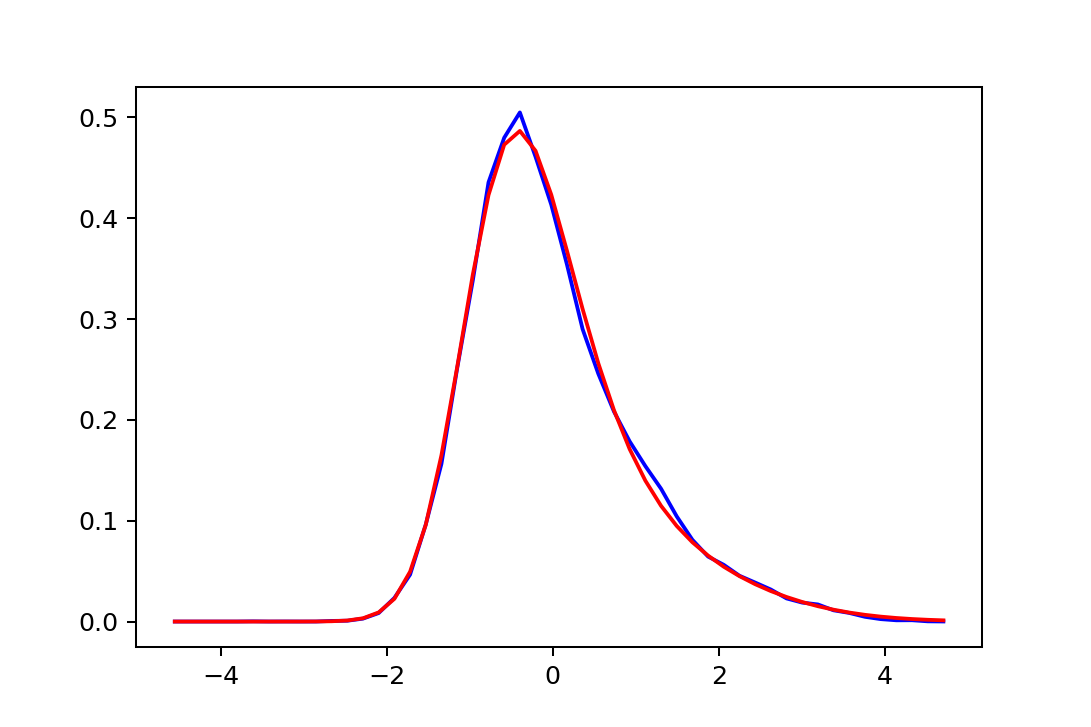

5.291326189326738 5.289098051585007
9.621201016847729e-09 -0.0026065148727894374


In [4]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
#ax.set_xlim(-3,3)

uc = (x-xavg)/xrms
ye = y/dx*xrms
ax.plot(uc,ye,"b-")

u1 = uf(uc)
ya = np.exp(-0.5*u1**2)/np.sqrt(2*np.pi)*dufdu(uc)

print(np.sum(ye),np.sum(ya))
print(np.sum(uc*ye)/np.sum(ye),np.sum(uc*ya)/np.sum(ya))

ax.plot(uc,ya,"r-")